<a href="https://colab.research.google.com/github/yoobyoungcheol/kaggle_modeling_test/blob/master/6_1_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 환경 설정

In [ ]:
# 라이브러리 설정
import pandas as pd
import numpy as np
import tensorflow as tf
import random

# 랜덤 시드 고정
SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# 구글 드라이브 폴더 마운트
from google.colab import drive, files
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# 2. 데이터셋 준비

In [ ]:
# 데이콘 사이트에서 다운로드한 CSV파일을 읽어오기
drive_path = "/gdrive/My Drive/"
train = pd.read_csv(drive_path + "mnist_data/train.csv")
test = pd.read_csv(drive_path + "mnist_data/test.csv")
submission = pd.read_csv(drive_path + "mnist_data/sample_submission.csv")

print(train.shape, test.shape, submission.shape)

(60000, 786) (10000, 785) (10000, 2)


In [ ]:
# train 데이터 보기
train.head()

,index,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6,0,0,0,0,0,0,0,5,...,0,0,0,30,43,0,0,0,0,0
3,3,0,0,0,0,1,2,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# train 데이터를 28*28 이미지로 변환
train_images = train.loc[:, 'pixel1':].values.reshape(-1, 28, 28)
train_images.shape

(60000, 28, 28)

In [ ]:
print(train_images[0].shape)
print()
print(train_images[7])

(28, 28)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 

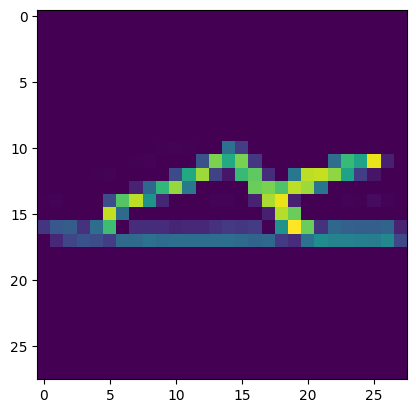

In [ ]:
# 첫번째 이미지 출력
import matplotlib.pyplot as plt
plt.imshow(train_images[7], cmap='viridis');

In [ ]:
# 목표 레이블
y_train = train.loc[:, 'label']
y_train.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [ ]:
# 숫자 레이블을 실제 레이블과 연결하여 확인
target_values = {0 : 'T-shirt/top',
                 1 : 'Trouser',
                 2: 'Pullover',
                 3: 'Dress',
                 4: 'Coat',
                 5: 'Sandal',
                 6: 'Shirt',
                 7: 'Sneaker',
                 8: 'Bag',
                 9: 'Ankle boot'}
print(y_train[0])
print(target_values[y_train[499]])

2
Trouser


In [ ]:
# test 데이터를 28*28 이미지로 변환
test_images = test.loc[:, 'pixel1':].values.reshape(-1, 28, 28)
test_images.shape

(10000, 28, 28)

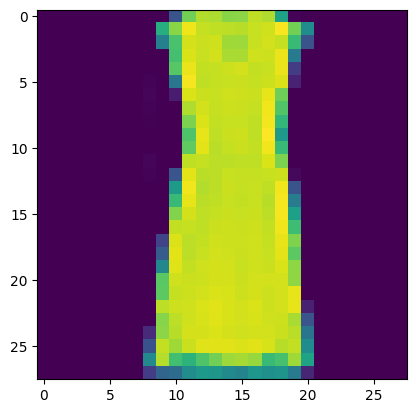

In [ ]:
# 500번째 test 이미지를 출력
plt.imshow(test_images[499]);

# 2. 데이터 전처리 (Pre-processing)

In [ ]:
# 피처 스케일 맞추기
X_train = train_images / 255.
X_test = test_images / 255.
print("최소값:", X_train[0].min())
print("최대값:", X_train[0].max())

최소값: 0.0
최대값: 1.0


In [ ]:
# 채널 차원 추가
print("변환 전:", X_train.shape, X_test.shape)
print(X_train[10][0])
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
print("변환 후:", X_train.shape, X_test.shape)
print(X_train[10][0])

변환 전: (60000, 28, 28) (10000, 28, 28)
[0.         0.         0.         0.         0.00392157 0.
 0.         0.         0.         0.16078431 0.63529412 0.65490196
 0.32941176 0.11764706 0.14901961 0.36862745 0.69411765 0.69019608
 0.10196078 0.         0.         0.         0.00392157 0.
 0.         0.         0.         0.        ]
변환 후: (60000, 28, 28, 1) (10000, 28, 28, 1)
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.00392157]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.16078431]
 [0.63529412]
 [0.65490196]
 [0.32941176]
 [0.11764706]
 [0.14901961]
 [0.36862745]
 [0.69411765]
 [0.69019608]
 [0.10196078]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.00392157]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


In [ ]:
# Train - Validation 데이터 구분
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val =  train_test_split(X_train, y_train, test_size=0.2,
                                             stratify=y_train,
                                             shuffle=True, random_state=SEED)
print("학습 데이터셋 크기: ", X_tr.shape, y_tr.shape)
print("검증 데이터셋 크기: ", X_val.shape, y_val.shape)

학습 데이터셋 크기:  (48000, 28, 28, 1) (48000,)
검증 데이터셋 크기:  (12000, 28, 28, 1) (12000,)


# 3. 모델 구축

MLP(다층 퍼셉트론)과 CNN(합성곱 신경망)은 둘 다 인공 신경망의 종류입니다.

MLP (다층 퍼셉트론):
MLP는 기본적인 피드포워드 신경망으로, 입력층, 은닉층, 그리고 출력층으로 이루어져 있습니다. 각 층은 여러 개의 뉴런으로 구성되어 있고, 각 뉴런은 이전 층의 모든 뉴런과 연결되어 있습니다. 이는 전체적으로 fully connected 구조라고도 불립니다. MLP는 주로 분류 및 회귀 작업에 사용되며, 각 층은 활성화 함수를 사용하여 비선형성을 도입합니다.

CNN (합성곱 신경망):
CNN은 이미지 처리에 주로 사용되는 신경망 구조입니다. CNN은 합성곱층과 풀링층으로 이루어져 있습니다. 합성곱층은 입력 이미지에서 특징을 추출하는 역할을 하며, 이를 통해 이미지의 공간적인 구조를 유지합니다. 풀링층은 공간적인 차원을 줄이고 계산량을 감소시킵니다. 이후에는 fully connected층이 있어 최종적인 예측을 수행합니다.

### MLP 모델

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=[28, 28]))
mlp_model.add(Dense(units=64, activation='relu'))
mlp_model.add(Dense(units=10, activation='softmax'))

mlp_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

mlp_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                50240     
                                                                 
 dense_17 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
mlp_history = mlp_model.fit(X_tr, y_tr, batch_size=64, epochs=20,
                        validation_data=(X_val, y_val),
                        verbose=2)

Epoch 1/20
750/750 - 3s - loss: 0.5704 - acc: 0.8033 - val_loss: 0.4563 - val_acc: 0.8404 - 3s/epoch - 4ms/step
Epoch 2/20
750/750 - 3s - loss: 0.4194 - acc: 0.8518 - val_loss: 0.3969 - val_acc: 0.8593 - 3s/epoch - 3ms/step
Epoch 3/20
750/750 - 2s - loss: 0.3835 - acc: 0.8639 - val_loss: 0.3895 - val_acc: 0.8667 - 2s/epoch - 3ms/step
Epoch 4/20
750/750 - 2s - loss: 0.3601 - acc: 0.8707 - val_loss: 0.3904 - val_acc: 0.8614 - 2s/epoch - 2ms/step
Epoch 5/20
750/750 - 2s - loss: 0.3415 - acc: 0.8764 - val_loss: 0.3696 - val_acc: 0.8711 - 2s/epoch - 3ms/step
Epoch 6/20
750/750 - 2s - loss: 0.3264 - acc: 0.8829 - val_loss: 0.3537 - val_acc: 0.8790 - 2s/epoch - 2ms/step
Epoch 7/20
750/750 - 2s - loss: 0.3141 - acc: 0.8854 - val_loss: 0.3439 - val_acc: 0.8787 - 2s/epoch - 2ms/step
Epoch 8/20
750/750 - 2s - loss: 0.3018 - acc: 0.8909 - val_loss: 0.3561 - val_acc: 0.8736 - 2s/epoch - 3ms/step
Epoch 9/20
750/750 - 2s - loss: 0.2917 - acc: 0.8935 - val_loss: 0.3399 - val_acc: 0.8821 - 2s/epoch - 3

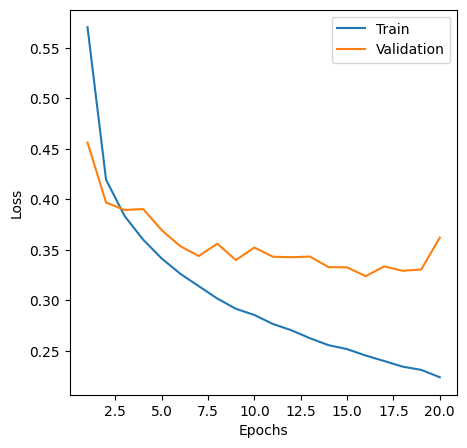

In [ ]:
# 손실 함수 그래프
def plot_loss_curve(history, total_epoch=10, start=1):
    plt.figure(figsize=(5, 5))
    plt.plot(range(start, total_epoch + 1),
             history.history['loss'][start-1:total_epoch],
             label='Train')
    plt.plot(range(start, total_epoch + 1),
             history.history['val_loss'][start-1:total_epoch],
             label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss_curve(history=mlp_history, total_epoch=20, start=1)

### CNN 활용

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=16, kernel_size=(3, 3),
                    activation='relu', input_shape=[28, 28, 1]))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dense(units=10, activation='softmax'))

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

cnn_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 2704)              0         
                                                                 
 dense_18 (Dense)            (None, 64)                173120    
                                                                 
 dense_19 (Dense)            (None, 10)                650       
                                                                 
Total params: 173930 (679.41 KB)
Trainable params: 173930 (679.41 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
cnn_history = cnn_model.fit(X_tr, y_tr, batch_size=64, epochs=20,
                        validation_data=(X_val, y_val),
                        verbose=2)

Epoch 1/20
750/750 - 3s - loss: 0.5042 - acc: 0.8227 - val_loss: 0.3795 - val_acc: 0.8677 - 3s/epoch - 4ms/step
Epoch 2/20
750/750 - 2s - loss: 0.3457 - acc: 0.8775 - val_loss: 0.3246 - val_acc: 0.8872 - 2s/epoch - 3ms/step
Epoch 3/20
750/750 - 3s - loss: 0.3001 - acc: 0.8926 - val_loss: 0.3075 - val_acc: 0.8923 - 3s/epoch - 4ms/step
Epoch 4/20
750/750 - 2s - loss: 0.2704 - acc: 0.9028 - val_loss: 0.2925 - val_acc: 0.8977 - 2s/epoch - 3ms/step
Epoch 5/20
750/750 - 2s - loss: 0.2477 - acc: 0.9101 - val_loss: 0.2924 - val_acc: 0.8977 - 2s/epoch - 3ms/step
Epoch 6/20
750/750 - 2s - loss: 0.2300 - acc: 0.9166 - val_loss: 0.2796 - val_acc: 0.8972 - 2s/epoch - 3ms/step
Epoch 7/20
750/750 - 2s - loss: 0.2111 - acc: 0.9242 - val_loss: 0.2620 - val_acc: 0.9054 - 2s/epoch - 3ms/step
Epoch 8/20
750/750 - 3s - loss: 0.1948 - acc: 0.9288 - val_loss: 0.2594 - val_acc: 0.9054 - 3s/epoch - 3ms/step
Epoch 9/20
750/750 - 3s - loss: 0.1829 - acc: 0.9342 - val_loss: 0.2618 - val_acc: 0.9077 - 3s/epoch - 3

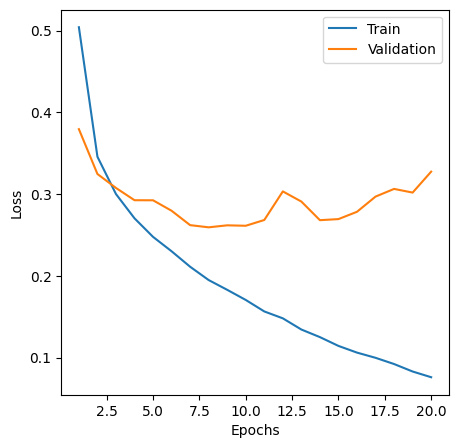

In [ ]:
plot_loss_curve(history=cnn_history, total_epoch=20, start=1)

In [ ]:
from tensorflow.keras.layers import Dropout
def build_cnn():
    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=(3, 3),
                     activation='relu', input_shape=[28, 28, 1]))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(units=10, activation='softmax'))

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])

    return model

cnn_model = build_cnn()
cnn_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 2704)              0         
                                                                 
 dense_20 (Dense)            (None, 64)                173120    
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 10)                650       
                                                     

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  patience=10)

cnn_history = cnn_model.fit(X_tr, y_tr, batch_size=64, epochs=100,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping],
                        verbose=2)

Epoch 1/100
750/750 - 4s - loss: 0.6353 - acc: 0.7811 - val_loss: 0.3673 - val_acc: 0.8715 - 4s/epoch - 5ms/step
Epoch 2/100
750/750 - 2s - loss: 0.4260 - acc: 0.8526 - val_loss: 0.3161 - val_acc: 0.8855 - 2s/epoch - 3ms/step
Epoch 3/100
750/750 - 3s - loss: 0.3765 - acc: 0.8694 - val_loss: 0.3017 - val_acc: 0.8940 - 3s/epoch - 3ms/step
Epoch 4/100
750/750 - 3s - loss: 0.3496 - acc: 0.8767 - val_loss: 0.2900 - val_acc: 0.8944 - 3s/epoch - 3ms/step
Epoch 5/100
750/750 - 2s - loss: 0.3295 - acc: 0.8841 - val_loss: 0.2785 - val_acc: 0.8998 - 2s/epoch - 3ms/step
Epoch 6/100
750/750 - 2s - loss: 0.3154 - acc: 0.8882 - val_loss: 0.2742 - val_acc: 0.9017 - 2s/epoch - 3ms/step
Epoch 7/100
750/750 - 2s - loss: 0.3023 - acc: 0.8931 - val_loss: 0.2739 - val_acc: 0.9007 - 2s/epoch - 3ms/step
Epoch 8/100
750/750 - 2s - loss: 0.2891 - acc: 0.8961 - val_loss: 0.2675 - val_acc: 0.9051 - 2s/epoch - 3ms/step
Epoch 9/100
750/750 - 3s - loss: 0.2789 - acc: 0.8998 - val_loss: 0.2669 - val_acc: 0.9030 - 3s/

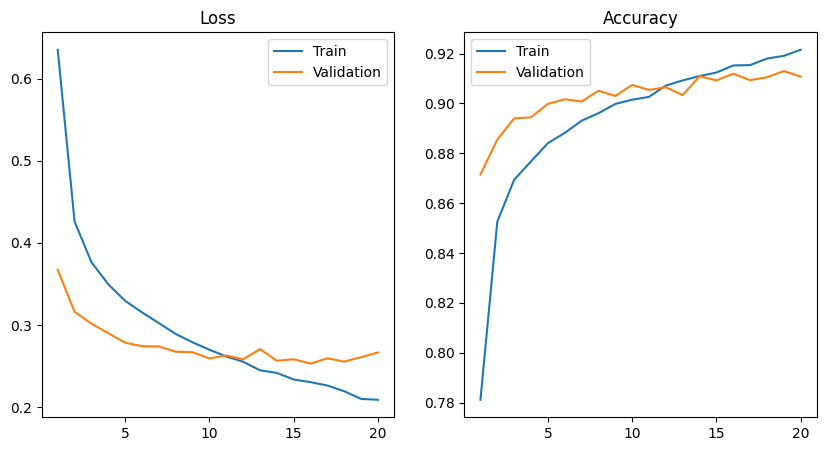

In [ ]:
# 20 epoch 까지 손실함수와 정확도를 그래프로 나타내기
start=1
end = 20

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(range(start, end+1), cnn_history.history['loss'][start-1:end],
             label='Train')
axes[0].plot(range(start, end+1), cnn_history.history['val_loss'][start-1:end],
             label='Validation')
axes[0].set_title('Loss')
axes[0].legend()

axes[1].plot(range(start, end+1), cnn_history.history['acc'][start-1:end],
             label='Train')
axes[1].plot(range(start, end+1), cnn_history.history['val_acc'][start-1:end],
             label='Validation')
axes[1].set_title('Accuracy')
axes[1].legend()
plt.show()

In [ ]:
cnn_model.evaluate(X_val, y_val)

375/375 [==============================] - 1s 3ms/step - loss: 0.2663 - acc: 0.9133


[0.2663465142250061, 0.9133333563804626]

In [ ]:
y_pred_proba = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_proba, axis=-1)
y_pred_classes[:10]

313/313 [==============================] - 1s 2ms/step


array([0, 1, 6, 2, 3, 6, 8, 6, 5, 0])

In [ ]:
submission['label'] = y_pred_classes
submission_filepath = drive_path + 'mnist_cnn_submission1.csv'
submission.to_csv(submission_filepath, index=False)

In [ ]:
# 사용자 정의 콜백 함수
from tensorflow.keras.callbacks import Callback

class my_callback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc') > 0.91):
      self.model.stop_training = True
      print("\n")
      print("목표 정확도 달성: 검증 정확도 %.4f" % logs.get('val_acc'))

my_callback = my_callback()

# Best Model 저장
from tensorflow.keras.callbacks import ModelCheckpoint

best_model_path = drive_path + "best_cnn_model.h5"
save_best_model = ModelCheckpoint(best_model_path, monitor='val_loss',
                                  save_best_only=True, save_weights_only=False)

# CNN 모델 학습
cnn_model = build_cnn()
cnn_history = cnn_model.fit(X_tr, y_tr, batch_size=64, epochs=100,
                        validation_data=(X_val, y_val),
                        callbacks=[my_callback, save_best_model],
                        verbose=2)

Epoch 1/100
750/750 - 3s - loss: 0.7417 - acc: 0.7365 - val_loss: 0.4218 - val_acc: 0.8520 - 3s/epoch - 4ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 - 3s - loss: 0.5122 - acc: 0.8207 - val_loss: 0.3581 - val_acc: 0.8749 - 3s/epoch - 3ms/step
Epoch 3/100
750/750 - 2s - loss: 0.4485 - acc: 0.8413 - val_loss: 0.3268 - val_acc: 0.8840 - 2s/epoch - 3ms/step
Epoch 4/100
750/750 - 3s - loss: 0.4066 - acc: 0.8571 - val_loss: 0.3123 - val_acc: 0.8876 - 3s/epoch - 4ms/step
Epoch 5/100
750/750 - 2s - loss: 0.3816 - acc: 0.8648 - val_loss: 0.2951 - val_acc: 0.8940 - 2s/epoch - 3ms/step
Epoch 6/100
750/750 - 3s - loss: 0.3601 - acc: 0.8730 - val_loss: 0.2884 - val_acc: 0.8963 - 3s/epoch - 3ms/step
Epoch 7/100
750/750 - 3s - loss: 0.3437 - acc: 0.8779 - val_loss: 0.2807 - val_acc: 0.8980 - 3s/epoch - 3ms/step
Epoch 8/100
750/750 - 3s - loss: 0.3323 - acc: 0.8811 - val_loss: 0.2757 - val_acc: 0.9018 - 3s/epoch - 3ms/step
Epoch 9/100
750/750 - 3s - loss: 0.3215 - acc: 0.8841 - val_loss: 0.2709 - val_acc: 0.9042 - 3s/epoch - 4ms/step
Epoch 10/100
750/750 - 2s - loss: 0.3111 - acc: 0.8896 - val_loss: 0.2741 - val_acc: 0.9022 - 2s/epoch - 3ms

In [ ]:
from tensorflow.keras.models import load_model
# ModelCheckPoint에 저장해둔 모델을 로딩
best_model = load_model(drive_path + "best_cnn_model.h5")
best_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 2704)              0         
                                                                 
 dense_22 (Dense)            (None, 64)                173120    
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                     

In [ ]:
y_pred_proba = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_proba, axis=-1)
submission['label'] = y_pred_classes
submission_filepath = drive_path + 'mnist_cnn_submission2.csv'
submission.to_csv(submission_filepath, index=False)

313/313 [==============================] - 1s 2ms/step
